


# Aprendizaje No Supervisado DiploDatos 2025
## Georgina Flesia y Laura Alonso Alemany

# Análisis FIFA 2018 - Clustering Reduced Dataset

##  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Inicialización-del-entorno</span>
Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [ ]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re#, wget, os
np.set_printoptions(legacy='1.25')

Este es un grupo de datos reducido y escogido, no tiene los nombre de los jugadores. Arma los clusters ovalados, ideal para mezcla de gaussianas?
Tiene las siguientes etiquetas de posiciones

In [ ]:
df = pd.read_csv("/content/fifa2018_data.csv")
df['PrefPos'].value_counts()

,count
PrefPos,
CB,1903
GK,1760
ST,1499
LB,649
CM,624
RB,549
RM,244
LM,213
RW,76


Se eligen solo los jugadores que se apercibe mediocampo, defensa ataque y arquero, y se dejan los intermedios.

In [ ]:


del df['Unnamed: 0']
df['PrefPos'] = df['PrefPos'].str.strip()
df = df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')]
df = df.reset_index(drop=True)
df['PrefPos'].value_counts()



,count
PrefPos,
CB,1903
GK,1760
ST,1499
CM,624


De todas las variables se eligen los scores de desempe~no

In [ ]:
X=df.iloc[:,0:38:1]
X=X.drop(['Wage'], axis=1)
X.head()

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision
0,30,92,92,2291,88,78,86,60,91,83,...,92,93,83,87,38,77,89,45,80,84
1,31,92,92,1493,58,29,52,35,48,70,...,12,85,55,25,11,61,44,10,83,70
2,26,90,92,1458,57,38,60,43,42,64,...,12,88,50,31,13,58,40,21,64,68
3,28,91,91,2143,79,80,78,80,89,87,...,91,91,83,88,19,83,79,42,84,78
4,28,88,88,2038,62,66,64,58,77,91,...,56,85,80,71,90,65,66,92,85,79


##  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">PCA  sin escalar mas K medias</span>

Vamos a hacer K medias sobre componentes principales, como reduccion de dimension, sin escalar y luego escalando los datos.

Primero observemos cuantas componentes son necesarias para explicar los datos

In [ ]:


from sklearn.decomposition import PCA
dim_reduce = PCA() #dim reduction
dim_reduce_fit = dim_reduce.fit_transform(X)

explained_variance=dim_reduce.explained_variance_ratio_
cum_var_exp = np.cumsum(explained_variance) # Cumulative explained variance
#print(list(zip(range(37),cum_var_exp)))
# Iterate through the zipped list and print each pair
for num_components, cumulative_variance, explained_variance in zip(range(37), cum_var_exp,explained_variance):
    print(f"{num_components+1}\t{cumulative_variance:.4f}\t{explained_variance:.4f}")

1	0.9436	0.9436
2	0.9672	0.0236
3	0.9819	0.0147
4	0.9855	0.0036
5	0.9882	0.0027
6	0.9893	0.0011
7	0.9904	0.0010
8	0.9912	0.0009
9	0.9919	0.0007
10	0.9926	0.0007
11	0.9933	0.0007
12	0.9939	0.0006
13	0.9944	0.0005
14	0.9950	0.0005
15	0.9955	0.0005
16	0.9959	0.0005
17	0.9963	0.0004
18	0.9967	0.0004
19	0.9971	0.0003
20	0.9974	0.0003
21	0.9977	0.0003
22	0.9980	0.0003
23	0.9982	0.0003
24	0.9985	0.0002
25	0.9987	0.0002
26	0.9989	0.0002
27	0.9991	0.0002
28	0.9992	0.0002
29	0.9994	0.0001
30	0.9995	0.0001
31	0.9996	0.0001
32	0.9997	0.0001
33	0.9998	0.0001
34	0.9999	0.0001
35	1.0000	0.0001
36	1.0000	0.0000
37	1.0000	0.0000


Primeras dos componentes para plotear tienen el 97 % de la variabilidad

In [ ]:
xs = dim_reduce_fit[:,0]
ys = dim_reduce_fit[:,1]

df2=df.copy
df['xs']=xs
df['ys']=ys

Calculo las  15 componentes principales

In [ ]:
from sklearn.cluster import KMeans
def dim_reduction(x):
    dim_reduce = PCA(n_components=15) #dim reduction
    dim_reduce_fit = dim_reduce.fit_transform(x)
    return dim_reduce, dim_reduce_fit

dim_reduce, dim_reduce_fit = dim_reduction(X)



**dim_reduce_fit** es el nuevo dataframe con los scores de las 15 componentes principales

Me fijo cuantos grupos serian razonables para K medias con esas 15 componentes

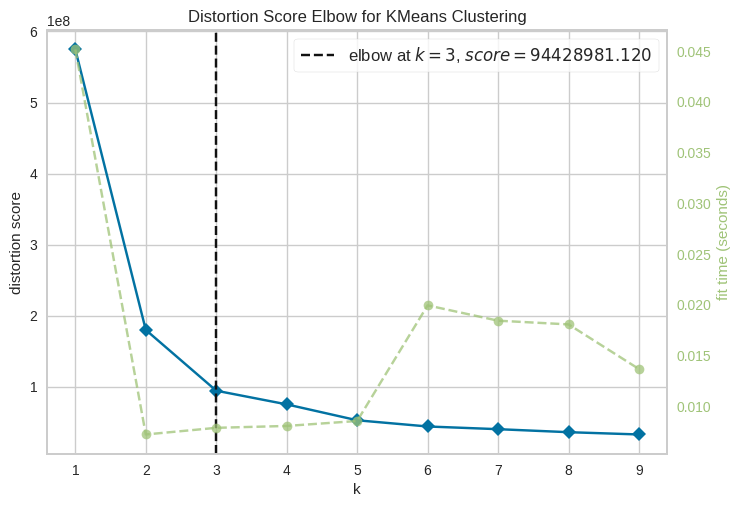

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
fig = KElbowVisualizer(model,k=(1,10))
fig.fit(dim_reduce_fit)
fig.show();

Coeficiente de silueta para 3 y cuatro grupos

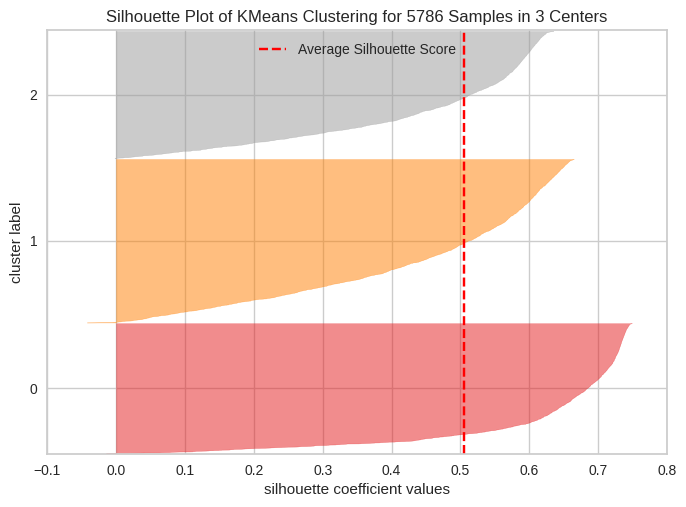

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5786 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3,random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(dim_reduce_fit)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

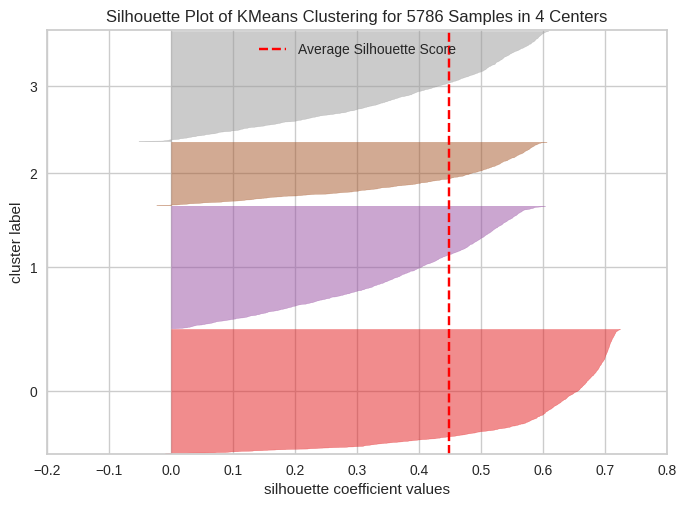

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5786 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4,random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(dim_reduce_fit)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Los dos son balanceados pero el de tres parece mejor, observemos los grupos ploteados en las componentes principales

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)

y_kmeans_new = kmeans.fit_predict(attributes_n)
df['y_kmeans_new']=y_kmeans_new

y_kmeans = kmeans.fit_predict(dim_reduce_fit )
df['y_kmeans']=y_kmeans

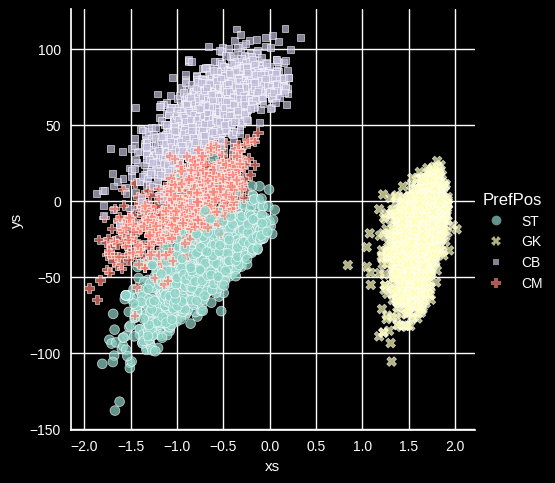

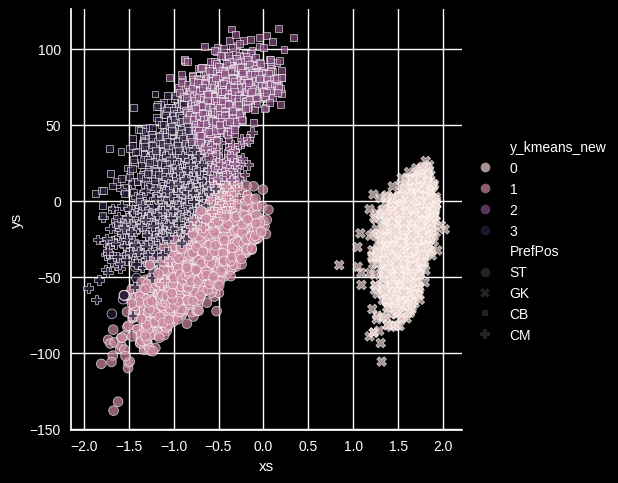

In [ ]:
xs = dim_reduce_fit[:,0]
ys = dim_reduce_fit[:,1]
df['xs']=xs
with plt.style.context('dark_background'):
    g = sns.relplot(x='xs',
                    y='ys',
                    hue="PrefPos",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)

    g = sns.relplot(x='xs',
                    y='ys',
                    hue="y_kmeans_new",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)
plt.show()

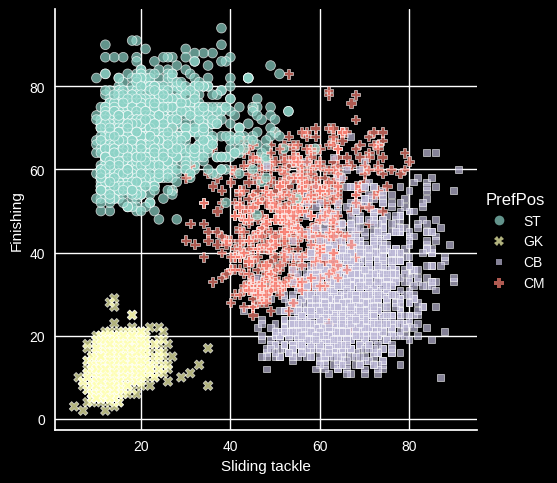

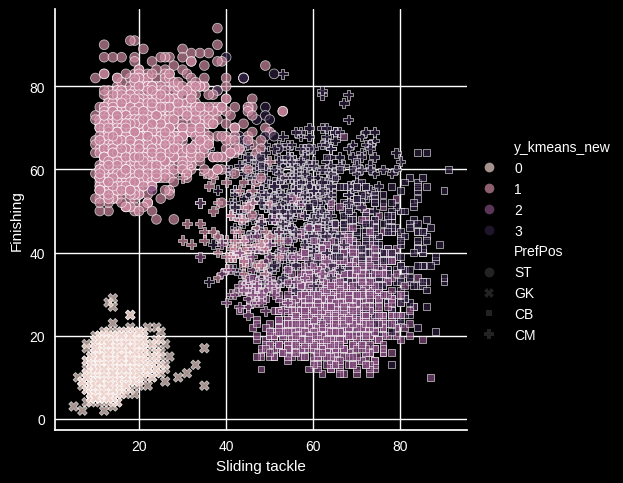

In [ ]:

with plt.style.context('dark_background'):

    g = sns.relplot(x="Sliding tackle",
                    y="Finishing",
                    hue="PrefPos",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)

    g = sns.relplot(x="Sliding tackle",
                    y="Finishing",
                    hue="y_kmeans_new",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)
plt.show()

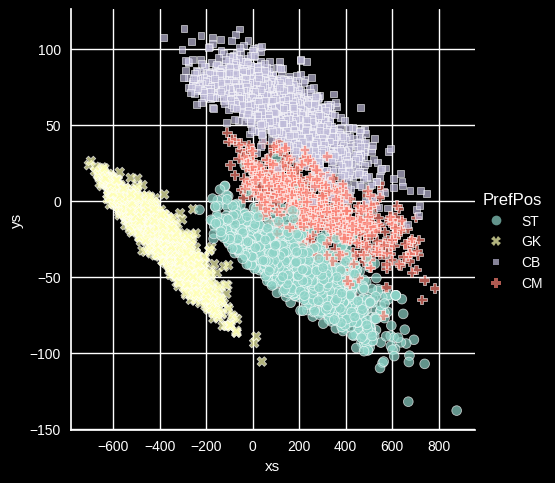

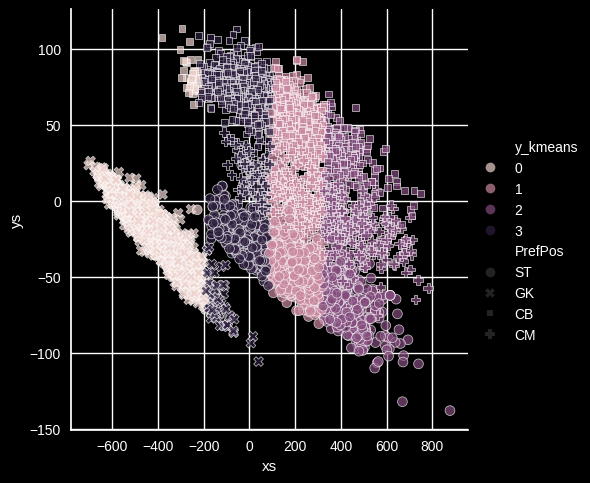

In [ ]:

xs = dim_reduce_fit[:,0]
ys = dim_reduce_fit[:,1]
df['xs']=xs
with plt.style.context('dark_background'):
    g = sns.relplot(x='xs',
                    y='ys',
                    hue="PrefPos",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)

    g = sns.relplot(x='xs',
                    y='ys',
                    hue="y_kmeans",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)
plt.show()

Es muy malo, veamos los valores de las medidas que usan las etiquetas

In [ ]:
fifacluster = pd.DataFrame(dim_reduce_fit)
fifacluster['cluster'] = y_kmeans
fifacluster['GPOS'] = df['PrefPos']

In [ ]:
from sklearn import metrics
results=[]
clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
results += [m(fifacluster['cluster'], fifacluster['GPOS']) for m in clustering_metrics]

print(results[0:5])

[0.41976635622051595, 0.43113364389733566, 0.4253740714955754, 0.4128624219059351, 0.4250389609426045]


##  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">PCA  sobre datos escalados y  K medias</span>

Veamos si mejora el agrupamiento escalando los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
attributes_n=scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
dim_reduce = PCA() #dim reduction
dim_reduce_fit = dim_reduce.fit_transform(attributes_n)

explained_variance=dim_reduce.explained_variance_ratio_
cum_var_exp = np.cumsum(explained_variance) # Cumulative explained variance
print(list(zip(range(37),cum_var_exp)))
for num_components, cum_var_exp, explained_variance in zip(range(37), cum_var_exp,explained_variance):
    print(f"{num_components+1}\t{cum_var_exp:.4f}\t{explained_variance:.4f}")

[(0, 0.6365883529131879), (1, 0.7857890234769964), (2, 0.8472201238613548), (3, 0.8756972134954792), (4, 0.8976360206971306), (5, 0.9132914572418931), (6, 0.9214903250241826), (7, 0.9290741461658665), (8, 0.9354521023370124), (9, 0.9411448303738145), (10, 0.9463722476742827), (11, 0.9512562530269378), (12, 0.9557791037986253), (13, 0.9600508812528766), (14, 0.9639784297301603), (15, 0.9675129893502303), (16, 0.9709236466894319), (17, 0.9740235812843129), (18, 0.9767391136697209), (19, 0.9793677575761062), (20, 0.9817805062447793), (21, 0.9839681364837634), (22, 0.9861064487447918), (23, 0.9878944318522163), (24, 0.989540652803828), (25, 0.9910369314070375), (26, 0.9924982359536716), (27, 0.9938150688764315), (28, 0.9950868274074383), (29, 0.9960740140185972), (30, 0.9968970980270511), (31, 0.9976313624166158), (32, 0.9983026565953379), (33, 0.9989167812714654), (34, 0.999468358596594), (35, 0.9999926138999158), (36, 1.0)]
1	0.6366	0.6366
2	0.7858	0.1492
3	0.8472	0.0614
4	0.8757	0.0285


Sorprendentemente, se necesitan muchas mas componentes principales para explicar la variabilidad....

Nos fijamos cuantos grupos marca la curva del codo de la inercia de K medias

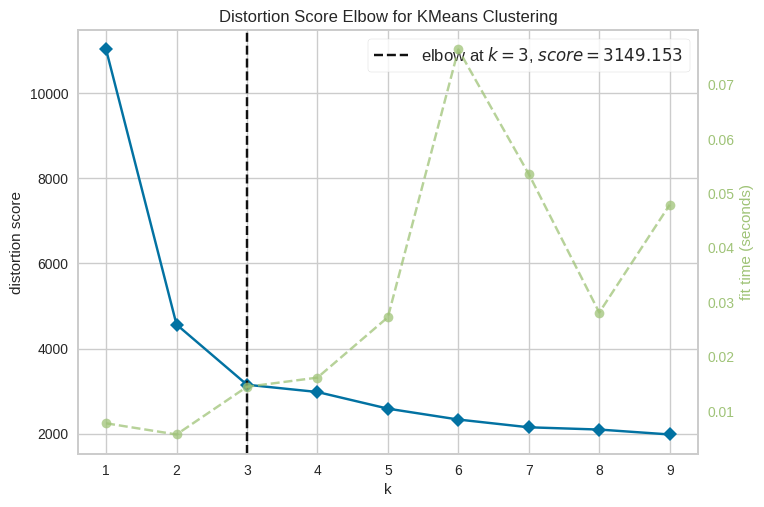

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
fig = KElbowVisualizer(model,k=(1,10))
fig.fit(dim_reduce_fit)
fig.show();

Coeficientes de silueta para k =3 y 4

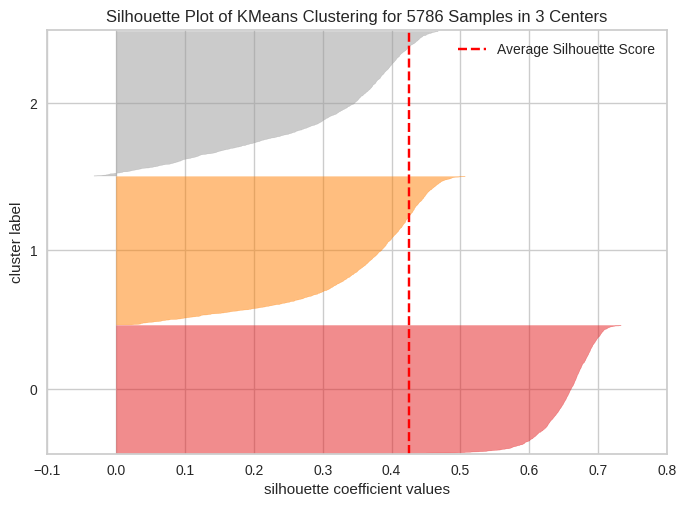

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5786 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3,random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(dim_reduce_fit)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

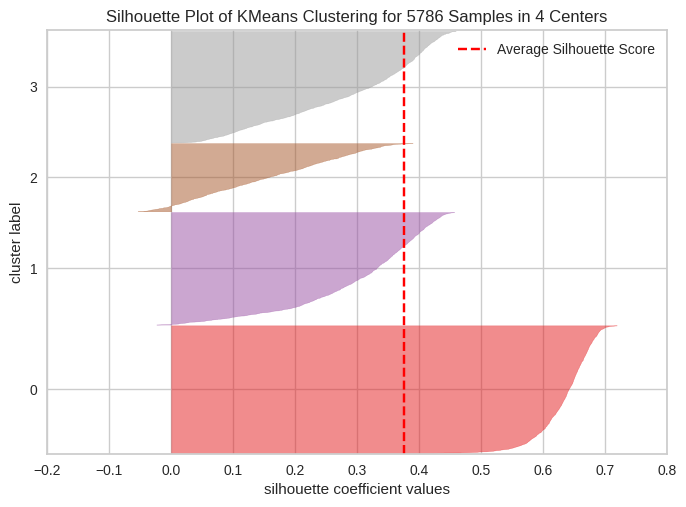

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5786 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4,random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(dim_reduce_fit)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Tampoco queda muy bello el plot de cuatro grupos. Veamos en las primeras dos componentes como se comporta

In [ ]:
model = KMeans()
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans2 = kmeans.fit_predict(dim_reduce_fit )
df['y_kmeans2']=y_kmeans2

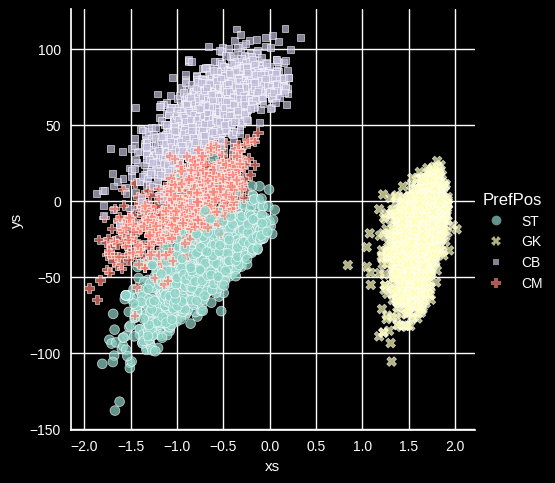

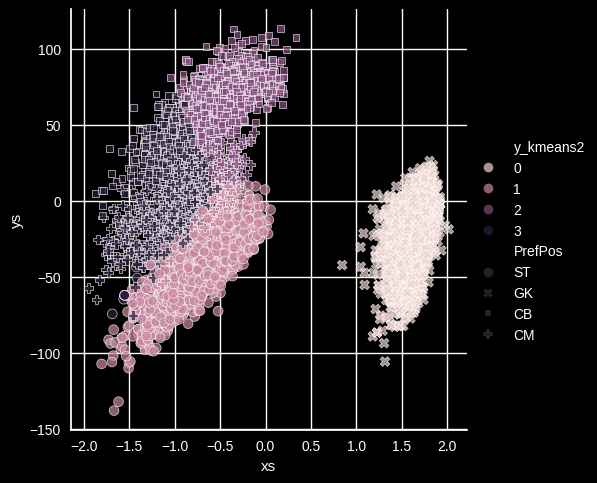

In [ ]:

xs = dim_reduce_fit[:,0]
ys = dim_reduce_fit[:,1]
df['xs']=xs
with plt.style.context('dark_background'):
    g = sns.relplot(x='xs',
                    y='ys',
                    hue="PrefPos",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)

    g = sns.relplot(x='xs',
                    y='ys',
                    hue="y_kmeans2",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)
plt.show()

In [ ]:
fifacluster['cluster2'] = y_kmeans2
results += [m(fifacluster['cluster2'], fifacluster['GPOS']) for m in clustering_metrics]

print(results[0:5])
print(results[5:10])

[0.41976635622051595, 0.43113364389733566, 0.4253740714955754, 0.4128624219059351, 0.4250389609426045]
[0.7939857616159598, 0.8207047180973015, 0.8071241750010373, 0.8141887244818125, 0.8070120602677018]


Mejoro mucho el agrupamiento

##  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024"> K medias sobre dos variables escogidas</span>

Nos fijamos cuantos grupos marca la curva del codo de la inercia de K medias

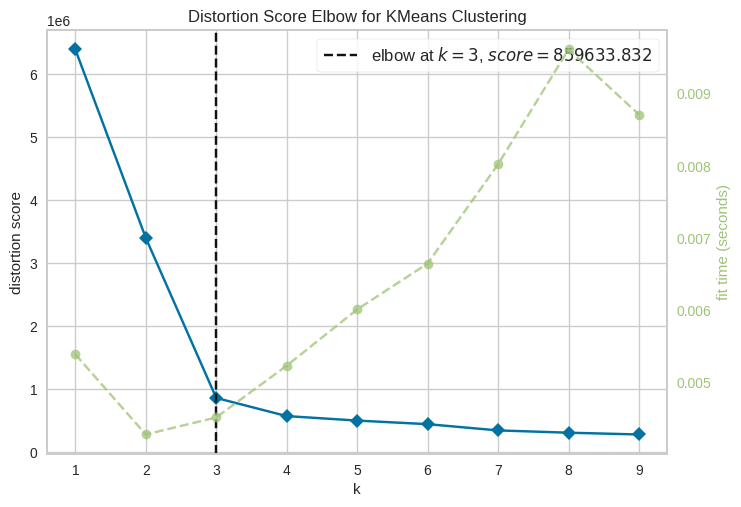

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
fig = KElbowVisualizer(model,k=(1,10))
fig.fit(df[['Sliding tackle','Finishing']] )
fig.show();

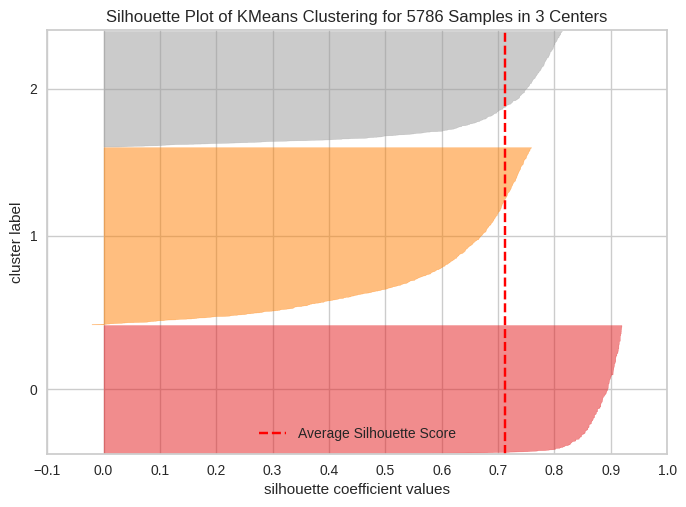

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5786 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3,random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df[['Sliding tackle','Finishing']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

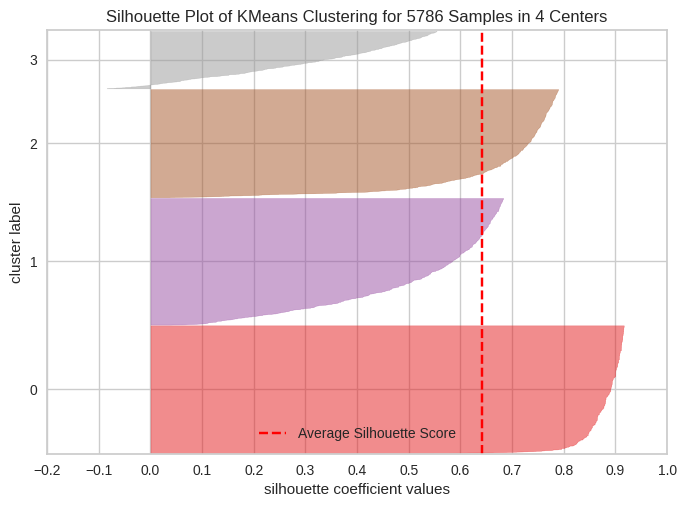

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5786 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4,random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df[['Sliding tackle','Finishing']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans3 = kmeans.fit_predict(df[['Sliding tackle','Finishing']] )
df['y_kmeans3']=y_kmeans3

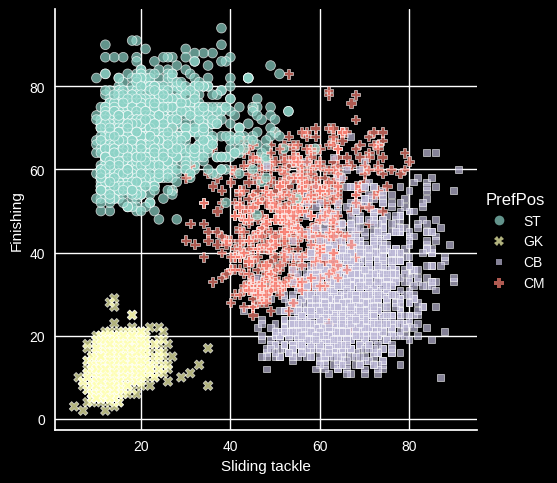

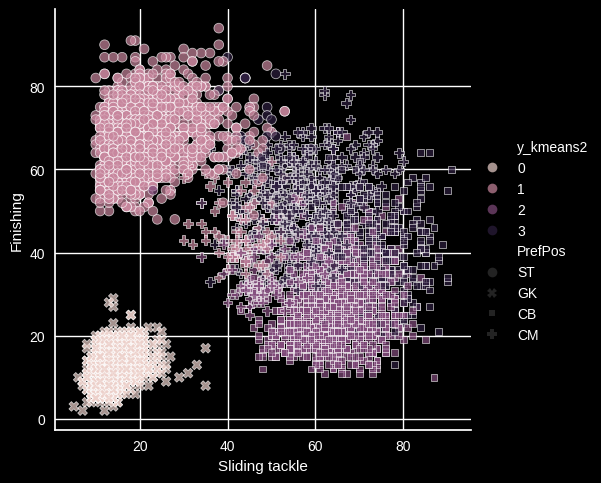

In [ ]:

with plt.style.context('dark_background'):

    g = sns.relplot(x="Sliding tackle",
                    y="Finishing",
                    hue="PrefPos",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)

    g = sns.relplot(x="Sliding tackle",
                    y="Finishing",
                    hue="y_kmeans2",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)
plt.show()

In [ ]:
fifacluster['cluster3'] = y_kmeans3
results += [m(fifacluster['cluster3'], fifacluster['GPOS']) for m in clustering_metrics]

print(list(results[0:5]))
print(list(results[5:10]))
print(list(results[10:15]))


[0.41976635622051595, 0.43113364389733566, 0.4253740714955754, 0.4128624219059351, 0.4250389609426045]
[0.7939857616159598, 0.8207047180973015, 0.8071241750010373, 0.8141887244818125, 0.8070120602677018]
[0.8295075538180402, 0.8487867642462273, 0.8390364251904191, 0.8577029662715663, 0.8389423749069822]


##  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Clustering jerarquico Ward linkage</span>

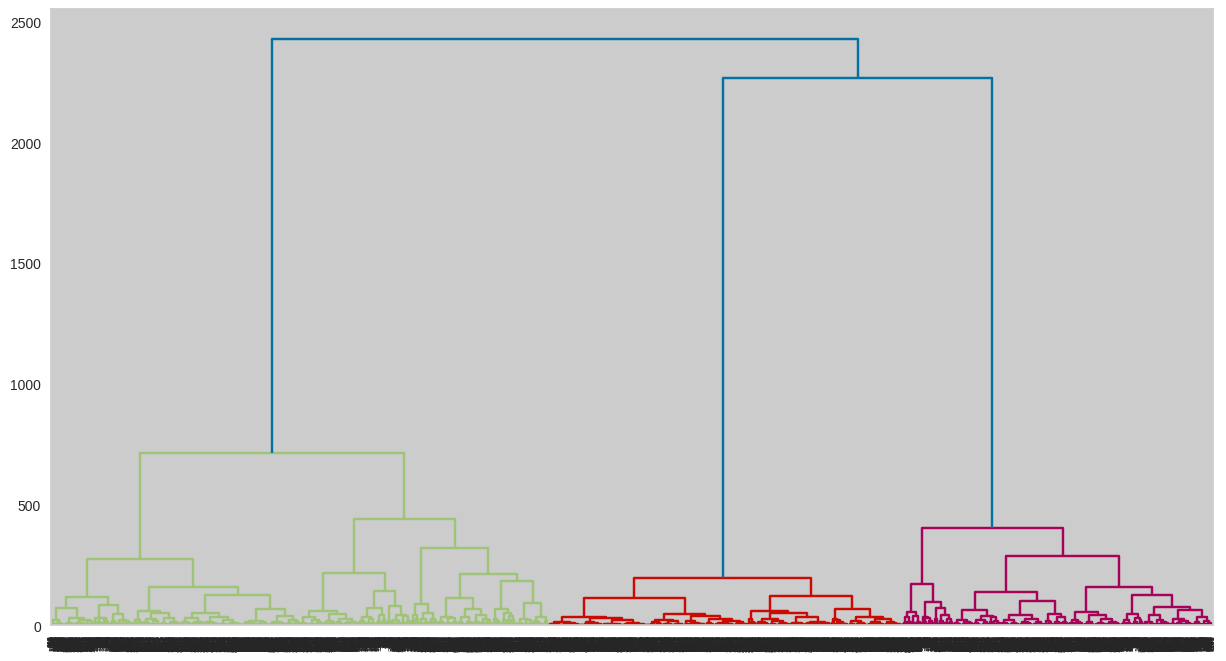

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')
# Fit the data into hierarchical clustering algorithm
dm = linkage(df[['Sliding tackle', 'Finishing']], method='ward')

# Create a dendrogram
plt.figure(figsize=(15,8))
dendr = dendrogram(dm)
plt.show()

In [ ]:
# Assign cluster label to each row
df['labels'] = fcluster(dm, 4, criterion = 'maxclust')

In [ ]:
 #Print cluster centers of each cluster
# Print cluster centers of each cluster
print(df.groupby('labels')[['Sliding tackle', 'Finishing']].mean())

        Sliding tackle  Finishing
labels                           
1            65.021739  23.561997
2            62.058065  43.644355
3            14.161364  12.475000
4            22.665155  67.729922


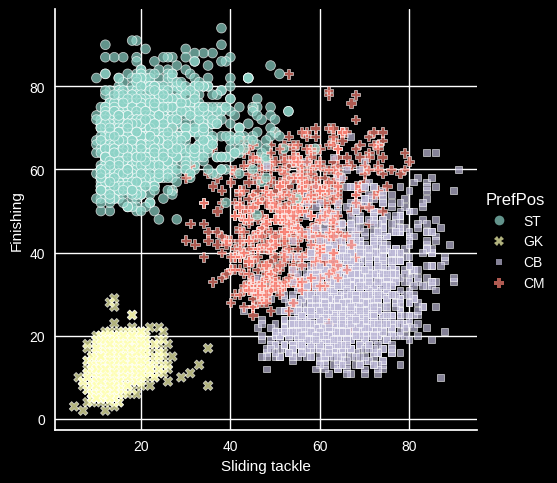

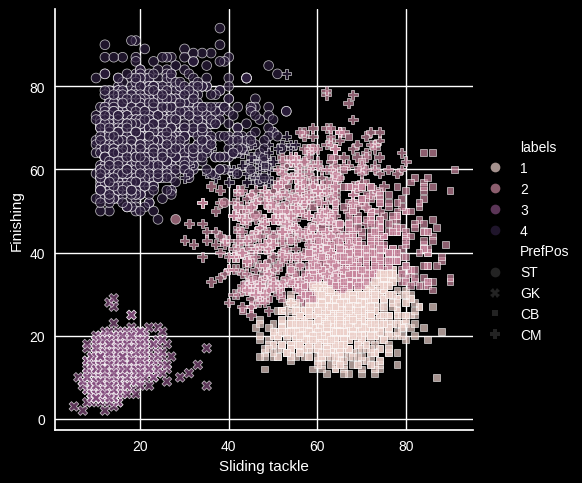

In [ ]:
with plt.style.context('dark_background'):

    g = sns.relplot(x="Sliding tackle",
                    y="Finishing",
                    hue="PrefPos",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)

    g = sns.relplot(x="Sliding tackle",
                    y="Finishing",
                    hue="labels",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)
plt.show()

In [ ]:
fifacluster['cluster4'] = df['labels']
results += [m(fifacluster['cluster4'], fifacluster['GPOS']) for m in clustering_metrics]

print(results[0:5])
print(results[5:10])
print(results[10:15])
print(results[15:20])

[0.41976635622051595, 0.43113364389733566, 0.4253740714955754, 0.4128624219059351, 0.4250389609426045]
[0.7939857616159598, 0.8207047180973015, 0.8071241750010373, 0.8141887244818125, 0.8070120602677018]
[0.8295075538180402, 0.8487867642462273, 0.8390364251904191, 0.8577029662715663, 0.8389423749069822]
[0.8112472016606114, 0.8463966103505399, 0.8284492442424455, 0.7954856156610333, 0.8283500012742913]


##  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Clustering jerarquico Complete linkage</span>

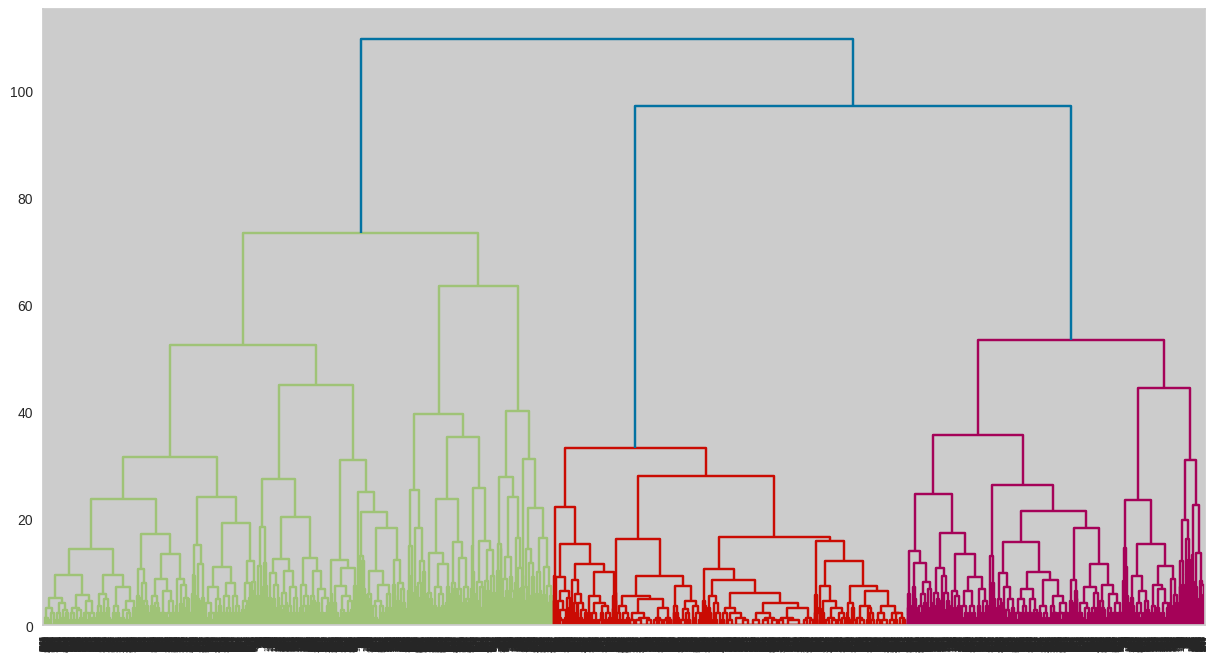

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')
# Fit the data into hierarchical clustering algorithm
dm2 = linkage(df[['Sliding tackle', 'Finishing']], method='complete')

# Create a dendrogram
plt.figure(figsize=(15,8))
dendr = dendrogram(dm2)
plt.show()

In [ ]:
# Assign cluster label to each row
df['labels2'] = fcluster(dm2, 4, criterion = 'maxclust')

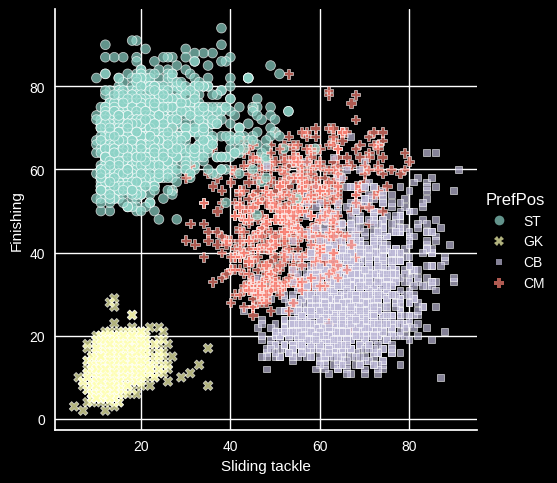

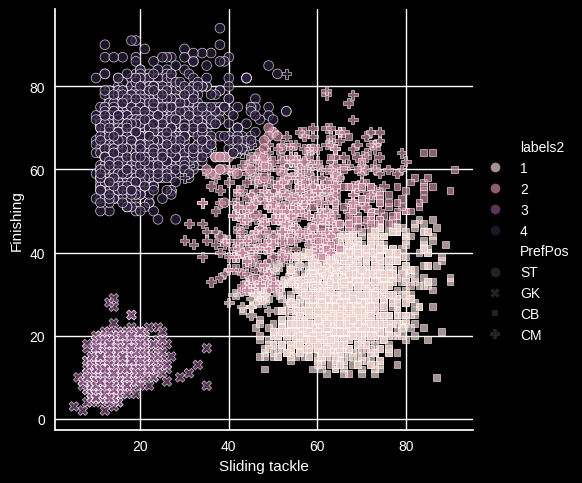

In [ ]:
with plt.style.context('dark_background'):

    g = sns.relplot(x="Sliding tackle",
                    y="Finishing",
                    hue="PrefPos",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)

    g = sns.relplot(x="Sliding tackle",
                    y="Finishing",
                    hue="labels2",
                    kind="scatter",
                    style = 'PrefPos',
                    data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')],
                    alpha = 0.7)
plt.show()

In [ ]:
fifacluster['cluster5'] = df['labels2']
results += [m(fifacluster['cluster5'], fifacluster['GPOS']) for m in clustering_metrics]

In [ ]:
# List of clustering methods in the order their results were added
method_names = [
    "PCA non-scaled + K-Means",
    "Scaled PCA + K-Means",
    "K-Means on Sliding Tackle and Finishing",
    "Hierarchical (Ward) on Sliding Tackle and Finishing",
    "Hierarchical (Complete) on Sliding Tackle and Finishing"
]

# List of metric names
metric_names = [
    "Homogeneity Score",
    "Completeness Score",
    "V-Measure Score",
    "Adjusted Rand Score",
    "Adjusted Mutual Info Score"
]

# Reshape the results list into a 2D array
reshaped_results = np.array(results).reshape(len(method_names), len(metric_names))

# Create the DataFrame
results_df = pd.DataFrame(reshaped_results, index=method_names, columns=metric_names)

# Print the DataFrame
print(results_df)

                                                    Homogeneity Score  \
PCA non-scaled + K-Means                                     0.419766   
Scaled PCA + K-Means                                         0.793986   
K-Means on Sliding Tackle and Finishing                      0.829508   
Hierarchical (Ward) on Sliding Tackle and Finis...           0.811247   
Hierarchical (Complete) on Sliding Tackle and F...           0.865241   

                                                    Completeness Score  \
PCA non-scaled + K-Means                                      0.431134   
Scaled PCA + K-Means                                          0.820705   
K-Means on Sliding Tackle and Finishing                       0.848787   
Hierarchical (Ward) on Sliding Tackle and Finis...            0.846397   
Hierarchical (Complete) on Sliding Tackle and F...            0.876846   

                                                    V-Measure Score  \
PCA non-scaled + K-Means                     